## Lasso CV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
import sklearn.cross_decomposition as cv
import sklearn

In [2]:
dataset=load_diabetes()
X=dataset['data']
y=dataset['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=15)
                         

In [3]:
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
# Linear regression
LR=LinearRegression()
LR.fit(X_train,y_train)
train_score_LR=LR.score(X_train,y_train)
print('The train score for Linear model is {}'.format(train_score_LR))

The train score for Linear model is 0.5264673022762947


In [5]:
#Lasso repression model
print('\n.....................Lasso Model.................................\n')
lasso=Lasso(alpha=0.05)
lasso.fit(X_train,y_train)
train_score_ls=lasso.score(X_train,y_train) 
print('The train score for lasso model is {}'.format(train_score_ls))



.....................Lasso Model.................................

The train score for lasso model is 0.5202972212652086


In [6]:
#Ridge Regressor
#Ridge Regression Model
print('Ridge Model...........................................')
ridgeReg=Ridge(alpha=0.05)
ridgeReg.fit(X_train,y_train)
train_score_ridge=ridgeReg.score(X_train, y_train)
print('\nRidge Model........................................\n')
print('The train score for ridge model {}'.format(train_score_ridge))

Ridge Model...........................................

Ridge Model........................................

The train score for ridge model 0.5196803709132061


In [7]:
enet_model=ElasticNet(alpha=0.05).fit(X_train,y_train)
train_enet_score=(enet_model.score(X_train,y_train))
print(train_enet_score)

0.17457313168898692


In [8]:
#Testing a model on testing data set
LR_test_score=LR.score (X_test,y_test)
lasso_test_score=lasso.score(X_test,y_test)
Ridge_test_score=ridgeReg.score(X_test,y_test)
enet_test_score=enet_model.score(X_test,y_test)
result=pd.DataFrame ({'LR test score': LR_test_score,
                      'Lasso test score': lasso_test_score, 
                      'Ridge test score': Ridge_test_score,
                      'enet test score': enet_test_score}, 
                    index=['Train Score','Test score'])
print(result)

             LR test score  Lasso test score  Ridge test score  \
Train Score        0.44598          0.475936          0.476187   
Test score         0.44598          0.475936          0.476187   

             enet test score  
Train Score         0.186364  
Test score          0.186364  


In [9]:
#Testing a model on testing data set
LR_test_score=LR.score(X_test,y_test)
lasso_test_score=lasso.score(X_test,y_test)
Ridge_test_score=ridgeReg.score(X_test,y_test)
enet_test_score=enet_model.score(X_test,y_test)
result=pd.DataFrame({'LR score': [train_score_LR,LR_test_score],
                      ' Lasso score': [train_score_ls,lasso_test_score], 
                      'Ridge score': [train_score_ridge,Ridge_test_score],
                      'Enet score': [train_enet_score,enet_test_score]}, 
                       index=['Train score','Test score'])
print(result)

             LR score   Lasso score  Ridge score  Enet score
Train score  0.526467      0.520297     0.519680    0.174573
Test score   0.445980      0.475936     0.476187    0.186364


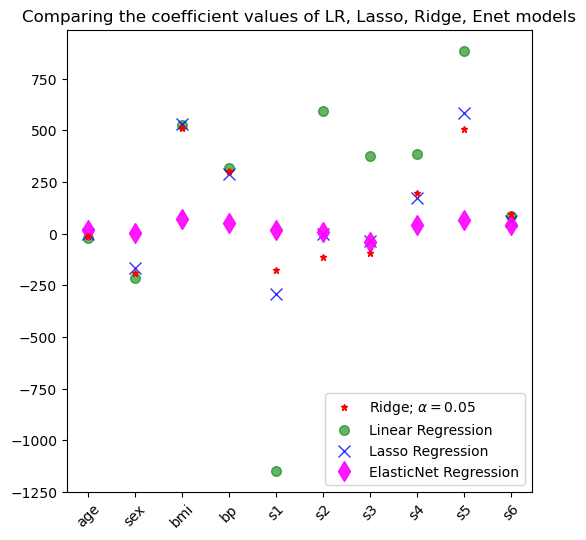

In [10]:
#Lets plot the coefficients for both the Linear and ridge models.
plt.figure(figsize=(6,6))
plt.plot(dataset.feature_names, ridgeReg.coef_,alpha=1, linestyle='none',
         marker='*', markersize=5,color='red', label=r'Ridge; $\alpha= 0.05$', zorder=7)

plt.plot(dataset.feature_names, LR.coef_, alpha=0.6, linestyle='none',
         marker='o', markersize=7,color='green', label='Linear Regression')

plt.plot(dataset.feature_names, lasso.coef_, alpha=0.8, linestyle='none',
         marker='x', markersize=9, color='blue', label='Lasso Regression')

plt.plot(dataset.feature_names, enet_model.coef_,alpha=0.9, linestyle='none',
         marker='d', markersize=10,color="magenta", label='ElasticNet Regression') 

plt.xticks (rotation=45 )
plt.title('Comparing the coefficient values of LR, Lasso, Ridge, Enet models')
plt.legend()
plt.show()

## Using Cross Validation

In [12]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV

In [13]:
#Using the Linear CV model
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
#Lasso Cross validation
lasso_cv=LassoCV(alphas=[0.0001, 0.0002,0.0009,0.001,0.002,0.003,0.0035,0.0003,0.01, 0.1, 1, 10], random_state=10).fit(X_train,y_train)
#score
print(f'tarining score: {lasso_cv.score(X_train, y_train)}')
print(lasso_cv.alpha_)

tarining score: 0.5264669617777764
0.0001


## Ridge Cross Validation

In [14]:
#Using the Linear CV model
from sklearn.linear_model import RidgeCV
#Ridge Cross validation
ridge_cv=RidgeCV (alphas=[0.0001,0.002, 0.001,0.01,0.02, 0.1, 1, 10,10.5,11,12,15,17,19,50, 100, 150]).fit(X_train, y_train)
#score
print("The train score for ridge model is {}".format(ridge_cv.score(X_train, y_train))) 
print(ridge_cv.alpha_)


The train score for ridge model is 0.5260780093795738
0.002


In [15]:
np.log(5)

1.6094379124341003

In [16]:
alpha=np.logspace (-5,-1,15)
np.empty_like (alpha)
print(alpha)

[1.00000000e-05 1.93069773e-05 3.72759372e-05 7.19685673e-05
 1.38949549e-04 2.68269580e-04 5.17947468e-04 1.00000000e-03
 1.93069773e-03 3.72759372e-03 7.19685673e-03 1.38949549e-02
 2.68269580e-02 5.17947468e-02 1.00000000e-01]


In [18]:
alphas=np.logspace (-5, -1, 15)
scores= np.empty_like(alphas)
for i,a in enumerate (alphas):
    lasso=Lasso()
    lasso.set_params(alpha=a) 
    lasso.fit(X_train, y_train)
    scores[i]=lasso.score(X_test,y_test)
    


0.0022208184708950337


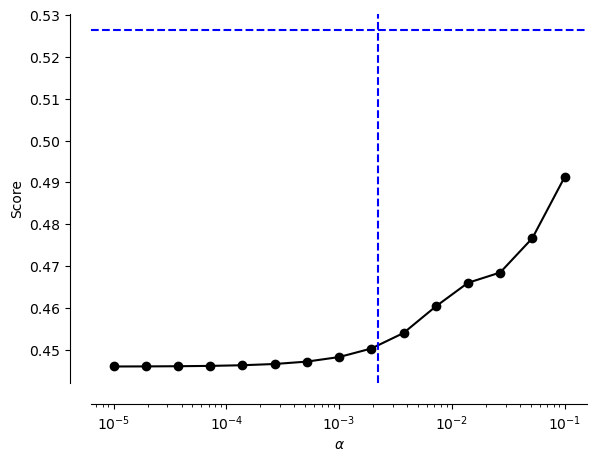

In [19]:
lassocv=LassoCV(random_state=0)
lassocv.fit(X_train,y_train)
lassocv_score=lassocv.score(X_train,y_train)
lassocv_alpha=lassocv.alpha_
print(lassocv_alpha)
#print('CV', Lassocv.coef_)
plt.plot(alphas, scores, '-ko')
plt.axhline (lassocv_score, color='b', ls='--')
plt.axvline(lassocv_alpha, color='b', ls='--')
plt.xlabel(r'$\alpha$')
plt.ylabel('Score')
plt.xscale('log')
sns.despine(offset=15)

## Elastic Net Regressor

In [20]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas=np.logspace(-3,1,num=30)
model=make_pipeline(StandardScaler(),RidgeCV(alphas=alphas))
cv_results=cross_validate(model,X_train,y_train,return_estimator=True,n_jobs=2)
print(cv_results)

{'fit_time': array([0.0279243 , 0.02399588, 0.00698113, 0.00798011, 0.00797868]), 'score_time': array([0.00199556, 0.00193453, 0.00199556, 0.00099587, 0.00199389]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-

In [21]:
score=cv_results['test_score']
print(score)
print(f'R2 score:{score.mean():.3f} ± {score.std():.3f}')

[0.50772164 0.5007892  0.54556953 0.45869147 0.4874042 ]
R2 score:0.500 ± 0.028


In [22]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
alphas=np.logspace(-3,1,num=30)
model=make_pipeline(StandardScaler(),ElasticNetCV(alphas=alphas))
cv_results=cross_validate(model,X_train,y_train,return_estimator=True,n_jobs=2)
print(cv_results)

{'fit_time': array([0.16683292, 0.16219616, 0.16555715, 0.16854835, 0.14560747]), 'score_time': array([0.00199485, 0.00195169, 0.00299263, 0.00199366, 0.00299215]), 'estimator': [Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.37382380e-03, 1.88739182e-03, 2.59294380e-03,
       3.56224789e-03, 4.89390092e-03, 6.72335754e-03, 9.23670857e-03,
       1.26896100e-02, 1.74332882e-02, 2.39502662e-02, 3.29034456e-02,
       4.52035366e-02, 6.21016942e-02, 8.53167852e-02, 1.17210230e-01,
       1.61026203e-01, 2.21221629e-01, 3.03919538e-01, 4.17531894e-01,
       5.73615251e-01, 7.88046282e-01, 1.08263673e+00, 1.48735211e+00,
       2.04335972e+00, 2.80721620e+00, 3.85662042e+00, 5.29831691e+00,
       7.27895384e+00, 1.00000000e+01])))]), Pipeline(steps=[('standardscaler', StandardScaler()),
                ('elasticnetcv',
                 ElasticNetCV(alphas=array([1.00000000e-03, 1.373823